###### The second project concerns comparing RBF and MLP models in a prediction problem. You may have 10 attributes about the chemical compound of different wines, and as output the quality of the wine (a real number). You may also consider public weather (temperature, rainfall) and financial datasets (time series) so you can form your input vectors using what happened in the last 5 days (5 attributes) to predict what will happen tomorrow, for example. Multiple step ahead prediction is also interesting. Historic data are available, so the output (tomorrow) is available to train models in a supervised way.

##### 1st Sauce: https://www.geeksforgeeks.org/data-normalization-with-pandas/
##### 2nd Sauce: https://www.tensorflow.org/tutorials/keras/regression

### MLP

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, LSTM, RepeatVector, TimeDistributed
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.cluster import KMeans

In [2]:
weather = pd.read_csv("weather.csv")

weather.head(3)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain


In [3]:
# Attribute selection:
weather = weather[["precipitation", "temp_max", "temp_min", "wind", "weather"]]

In [4]:
# One-Hot encoding:
# "One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction."

weather_one_hot = pd.get_dummies(weather['weather'])
weather = weather.drop('weather', axis=1)
weather = weather.join(weather_one_hot)
weather.sample(3)

,precipitation,temp_max,temp_min,wind,drizzle,fog,rain,snow,sun
421,2.3,10.6,3.3,7.1,0,0,1,0,0
35,0.0,13.9,1.7,2.9,0,0,0,0,1
865,0.0,26.7,12.8,3.0,0,0,0,0,1


In [5]:
# Copying the dataset for a backup, just in case:
weatherCopy = weather.copy()

# Normalizing our data using min-max feature scaling:
for column in weatherCopy.columns:
	# if(column != 'weather' and column != 'date'):
	weatherCopy[column] = (weatherCopy[column] - weatherCopy[column].min()) / (weatherCopy[column].max() - weatherCopy[column].min())


In [6]:
# Reordering of columns in order to get our target placed as the last column:
weatherCopy = weatherCopy[["precipitation", "temp_min", "wind", "drizzle", "fog", "rain", "snow", "sun", "temp_max"]]
weatherCopy.sample(3)

,precipitation,temp_min,wind,drizzle,fog,rain,snow,sun,temp_max
876,0.000000,0.716535,0.450549,0.0,0.0,0.0,0.0,1.0,0.534946
797,0.577818,0.543307,0.252747,0.0,0.0,1.0,0.0,0.0,0.387097
669,0.005367,0.696850,0.197802,0.0,0.0,1.0,0.0,0.0,0.430108


In [7]:
# Splitting the data into input and output columns:
x, y = weatherCopy.values[:, :-1], weatherCopy.values[:, -1]

# Ensure all values are floatinf types:
# x = x.astype('float32')

# Encode strings to integer:
# y = LabelEncoder().fit_transform(y)

# Split into training and testing datasets:
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=.33)

x_train, x_validation, y_train, y_validation = train_test_split(x_train_full, y_train_full)

# Determine the number of features:
n_features = x_train.shape[1]

# Show results:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print('Number of features:', n_features)

(733, 8) (483, 8) (733,) (483,)
Number of features: 8


In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_validation = scaler.fit_transform(x_validation)
x_test = scaler.fit_transform(x_test)

In [9]:
# model = tf.keras.Sequential([tf.keras.layers.Dense(30, activation = 'relu', input_shape = x_train.shape[1:]), tf.keras.layers.Dense(1)])

# Step-1 Define Model:
model= Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))  # Hidden Layer 1
model.add(Dense(8, activation='relu', kernel_initializer='he_normal')) # Hidden Layer 2
model.add(Dense(1, activation='sigmoid'))  # Output Layer

# Step-2 Compile the model:
model.compile(loss = tf.losses.mean_squared_error, optimizer = 'adam')

# Step-3 Fit the model:
model.fit(x_train, y_train, epochs=20, validation_data=(x_validation, y_validation), verbose=2)

Epoch 1/20
23/23 - 0s - loss: 0.0651 - val_loss: 0.0498 - 473ms/epoch - 21ms/step
Epoch 2/20
23/23 - 0s - loss: 0.0471 - val_loss: 0.0370 - 43ms/epoch - 2ms/step
Epoch 3/20
23/23 - 0s - loss: 0.0358 - val_loss: 0.0285 - 41ms/epoch - 2ms/step
Epoch 4/20
23/23 - 0s - loss: 0.0271 - val_loss: 0.0221 - 42ms/epoch - 2ms/step
Epoch 5/20
23/23 - 0s - loss: 0.0213 - val_loss: 0.0180 - 41ms/epoch - 2ms/step
Epoch 6/20
23/23 - 0s - loss: 0.0178 - val_loss: 0.0159 - 41ms/epoch - 2ms/step
Epoch 7/20
23/23 - 0s - loss: 0.0157 - val_loss: 0.0146 - 42ms/epoch - 2ms/step
Epoch 8/20
23/23 - 0s - loss: 0.0142 - val_loss: 0.0137 - 43ms/epoch - 2ms/step
Epoch 9/20
23/23 - 0s - loss: 0.0132 - val_loss: 0.0131 - 42ms/epoch - 2ms/step
Epoch 10/20
23/23 - 0s - loss: 0.0124 - val_loss: 0.0125 - 42ms/epoch - 2ms/step
Epoch 11/20
23/23 - 0s - loss: 0.0115 - val_loss: 0.0120 - 42ms/epoch - 2ms/step
Epoch 12/20
23/23 - 0s - loss: 0.0109 - val_loss: 0.0116 - 42ms/epoch - 2ms/step
Epoch 13/20
23/23 - 0s - loss: 0.01

In [10]:
# # Step-4 Evaluate the model:
#loss, acc = model.evaluate(x_test, y_test, verbose=0)
#print('Test accuracy : %.3f' %acc)

In [11]:
mean_squared_error_test = model.evaluate(x_test, y_test)
# x_new = x_test[:3] # New instance
y_pred = model.predict(x_test)
# y_pred

16/16 [==============================] - 0s 733us/step


In [12]:
y_pred.shape = (len(y_pred), )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


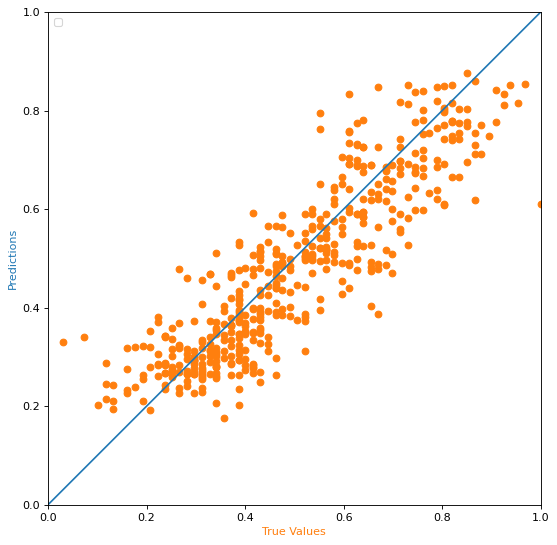

In [13]:
plt.figure(figsize=(10, 8), dpi=80)

a = plt.axes(aspect='equal')

plt.scatter(y_test, y_pred, color='C1')
plt.xlabel('True Values',  color='C1')
plt.ylabel('Predictions', color='C0')
plt.legend()
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)

_ = plt.plot(lims, lims)


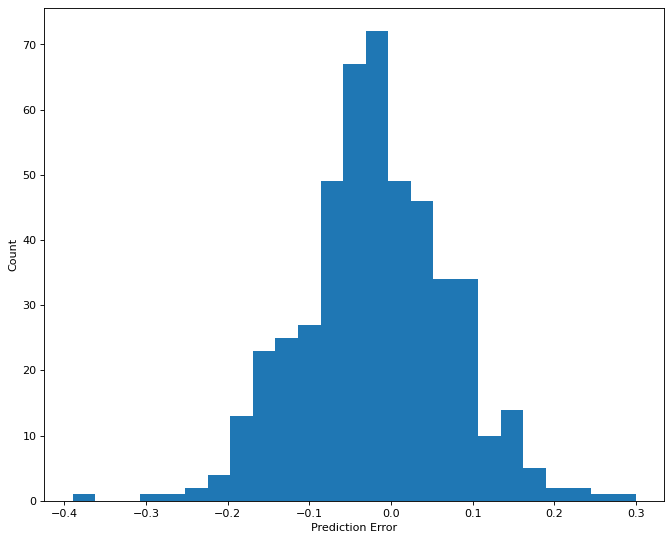

In [14]:
# Error Distribution:
error = y_pred - y_test
plt.figure(figsize=(10, 8), dpi=80)
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')
print


# ----------------------------------------------------------------------

# ----------------------------------------------------------------------

# ----------------------------------------------------------------------

# RBF

Source: https://www.hackerearth.com/blog/developers/radial-basis-function-network/

In [15]:
#Determine centers of the neurons using KMeans.

K_cent= 8
km= KMeans(n_clusters= K_cent, max_iter= 100)
km.fit(x_train)
cent= km.cluster_centers_

In [16]:
#Determine the value of sigma

max=0 
for i in range(K_cent):
	for j in range(K_cent):
		d= np.linalg.norm(cent[i]-cent[j])
		if(d> max):
			max= d
d= max

sigma= d/math.sqrt(2*K_cent)
print("Sigma: ", sigma)

Sigma:  2.302586886517378


In [17]:
#Set up matrix G.

shape= x_train.shape
row= shape[0]
column= K_cent
G= np.empty((row,column), dtype= float)
for i in range(row):
 for j in range(column):
  dist= np.linalg.norm(x_train[i]-cent[j])
  G[i][j]= math.exp(-math.pow(dist,2)/math.pow(2*sigma,2))

In [18]:
#Find weight matrix W to train the network.

GTG= np.dot(G.T,G)
GTG_inv= np.linalg.inv(GTG)
fac= np.dot(GTG_inv,G.T)
W= np.dot(fac,y_train)

In [19]:
#Set up matrix G for the test set.

row= x_test.shape[0]
column= K_cent
G_test= np.empty((row,column), dtype= float)
for i in range(row):
	for j in range(column):
		dist= np.linalg.norm(x_test[i]-cent[j])
		G_test[i][j]= math.exp(-math.pow(dist,2)/math.pow(2*sigma,2))

In [20]:
prediction= np.dot(G_test,W)
#prediction= 0.5*(np.sign(prediction-0.5)+1)

#score= accuracy_score(prediction,y_test)
#print(score.mean())

Text(0.5, 1.0, 'RBF: Max Temperature Predictions')

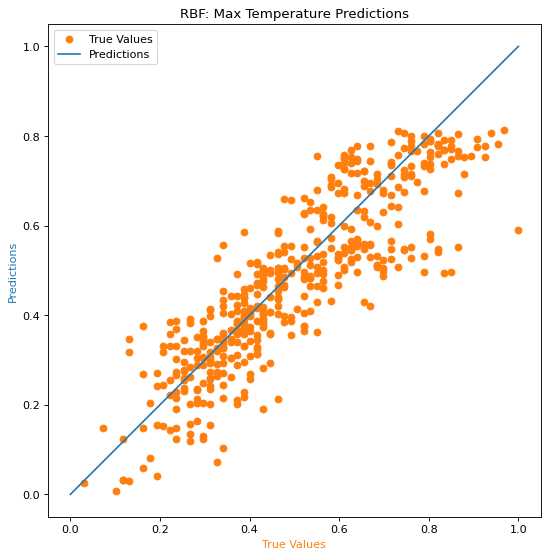

In [22]:
from cProfile import label


plt.figure(figsize=(10, 8), dpi=80)

a = plt.axes(aspect='equal')

plt.scatter(y_test, prediction, color='C1', label="True Values")
plt.xlabel('True Values',  color='C1')
plt.ylabel('Predictions', color='C0')
lims = [0, 1]
# plt.xlim(lims)
# plt.ylim(lims)

_ = plt.plot(lims, lims, label="Predictions")
plt.legend()

plt.title("RBF: Max Temperature Predictions")

Text(0.5, 1.0, 'RBF: Error distribution')

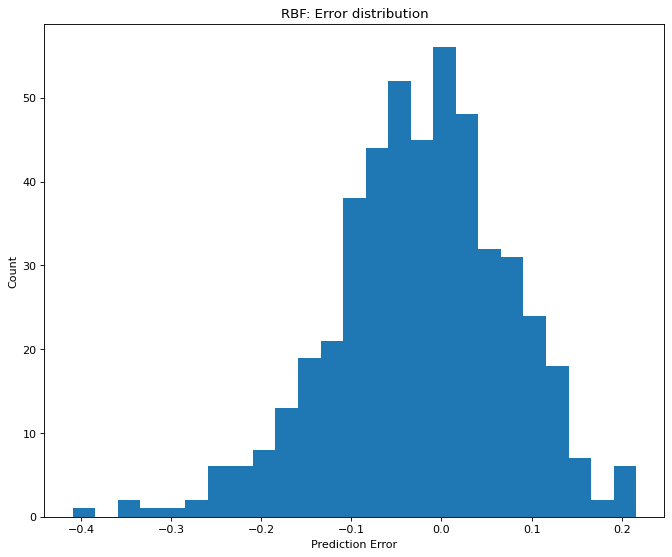

In [23]:
# Error Distribution:
error = prediction - y_test
plt.figure(figsize=(10, 8), dpi=80)
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')
plt.title("RBF: Error distribution")